# Title: Predicting Newsletter Subscription Tendency: kNN Classification Model for MineCraft Player Engagement

To build up success of online research platforms, particularly platforms collecting data on player activity in a video game environment, hinges on effective communication with and retain the user base. For the UBC computer science research group led by Frank Wood running the MineCraft server, understanding which player characteristics predict engagement and tendency to subscribe to the project newsletter, is vital for optimizing recruitment and commuication efforts. The core question is: What player characteristics are most predictive of subscribing to a game-related newsletter? And how do these features differ between various player types? More specifically: How might a player's experience and total hours played predict their tendency to subscribe to a newsletter? And how does this differ between players of various ages? 

This project utilizes datasets players.csv (unique player records with their descriptive features like player age and gender). First we will detail necessary data wrangling ad cleaning to handle missing values (NA) and structure data for modelling. Next, exploratory data analysis will be performed to visualize trendds between player attributes (Age, Experience, Hours Played) and binary subscription outcomes. Then a k-Nearest Neighbors (kNN) classification model will be implemented and evaluated to predict subscription statuses of players, providing the insights of which player profiles are most valuable for targeted communication. One potential issue that the data sets face are that there is missing data, which substitutes values for N/A. Additionally, players.csv is a relatively small data set with only 196 observations which may increase the difficulty in making accurate predictions.

players.csv variables:
| variable | type | description |
|----------|------|-------------|
| experience | character | experience level (Beginner, Amateur, Regular, Pro, Veteran) |
| subscribe | logical | newsletter subscription (True/False) |
| hashedEmail | character | player identifier |
| played_hours | double | total hours played |
| name | character | player name |
| gender | character | player's gender |
| Age | double | age in years |


## Methods and Results

The data analysis will be split up into five stages.
1. Loading the data and making it tidy
2. Creating new variables and replacing missing values
3. Conducting exploratory data analysis
4. Constructing a k-Nearest Neigbors classification model
5. Visualizing the results

## Loading and Tidying the Dataset

In [79]:
library(tidyverse)
library(tidymodels)

In [80]:
players <- read_csv("https://raw.githubusercontent.com/eshaanmaniani/DSCI-Project-Planning/refs/heads/main/players.csv")
#Converts subscription to a factor and makes a new column which seperates age groups
players <- players |>
  mutate(
    subscribe = as.factor(subscribe),
    age_group = case_when(
      Age < 20 ~ "Under 20",
      Age >= 20 & Age <= 30 ~ "20 to 30",
      Age > 30 & Age <= 40 ~ "31 to 40",
      Age > 40 ~ "Over 40",
      TRUE ~ "Unknown"))

players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age,age_group
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,Under 20
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,Under 20
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,Under 20
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,20 to 30
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,20 to 30
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,Under 20
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,Under 20
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,20 to 30
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47,Over 40


In this step, we load in the dataset using the read_csv function and make some changes to the dataset.
First, we convert subscribe into a categorical factor which is necessary for classification. Then we create age_group, so that they could be compared during exploratory data analysis.

## Summary Statistics

In [81]:
#Finds the mean for each numerical column
numeric_mean <- players |>
  select(where(is.numeric)) |>
  summarise(across(everything(), ~ round(mean(.x, na.rm = TRUE), 2)))

numeric_mean

played_hours,Age
<dbl>,<dbl>
5.85,21.14


### Table 1: Mean of Quantitative Variables
| quantitative variable | mean | 
|----------|------|
| played_hours | 5.85 | 
| Age | 21.14 | 

The values in Table 1 suggest that most players are young and play for relatively few hours

## Exploratory Data Analysis

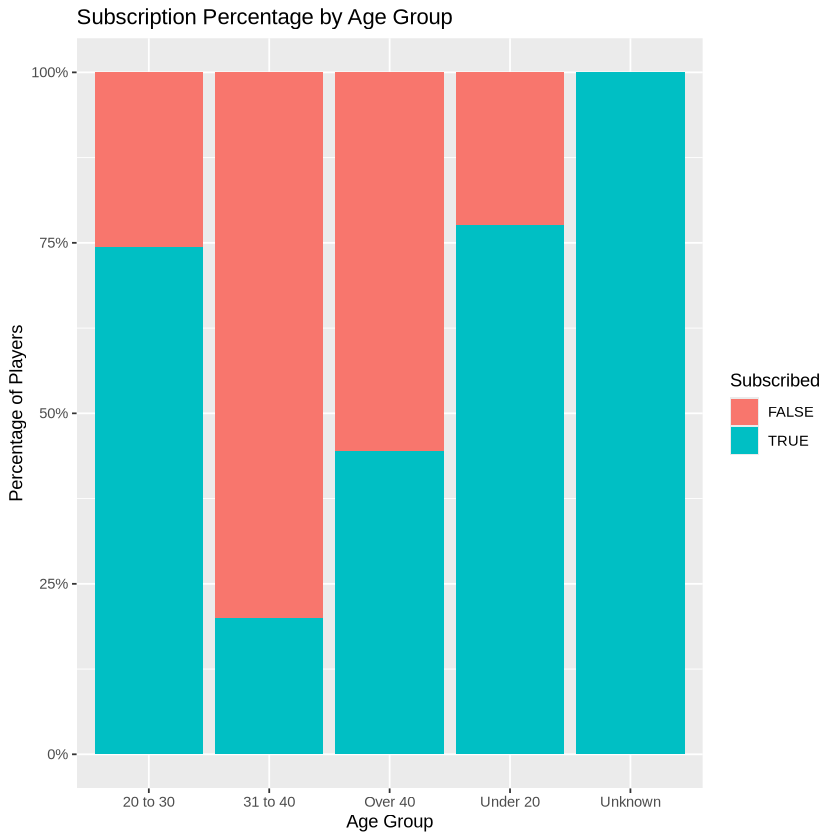

In [82]:
subscription_percentage <- ggplot(players, aes(x = age_group, fill = subscribe)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent) +
  labs(
    title = "Subscription Percentage by Age Group",
    x = "Age Group",
    y = "Percentage of Players",
    fill = "Subscribed"
  )
subscription_percentage

### Figure 1: Subscription Percentage by Age Group

Figure 1 reveals that newsletter subscription is highly age dependent. The highest subscription percentage occurs at the youngest ages (20-30), but it is also significant for those over 40, whereas the lowest percentages occur for those between 31-40. This suggests that player characteristics, specifically age, meaningfully influences their likelihood of subscribing to newsletters.


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


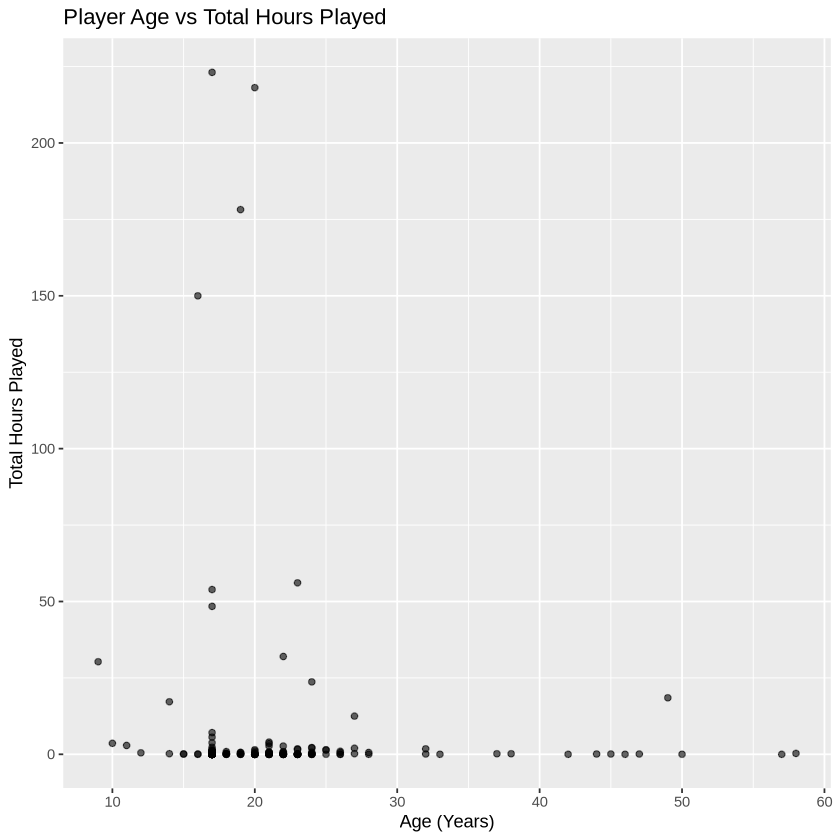

In [69]:
players_vs_hours <- ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.6) +
  labs(
    title = "Player Age vs Total Hours Played",
    x = "Age (Years)",
    y = "Total Hours Played"
  )

players_vs_hours

### Figure 2: Player Age vs Total Hours Played

Figure 2 shows that younger players (approximately 10-25 years old) display a wide range of total hours played, including several outlier values exceeding 150 hours played. In contrast, almost all players over 30 fall under 10 hours of total playtime, suggesting lower engagement. Generally, the distribution is heavilly skewed towards lower playtime, and the significant variablity among young players shows that engagement is very age dependent.

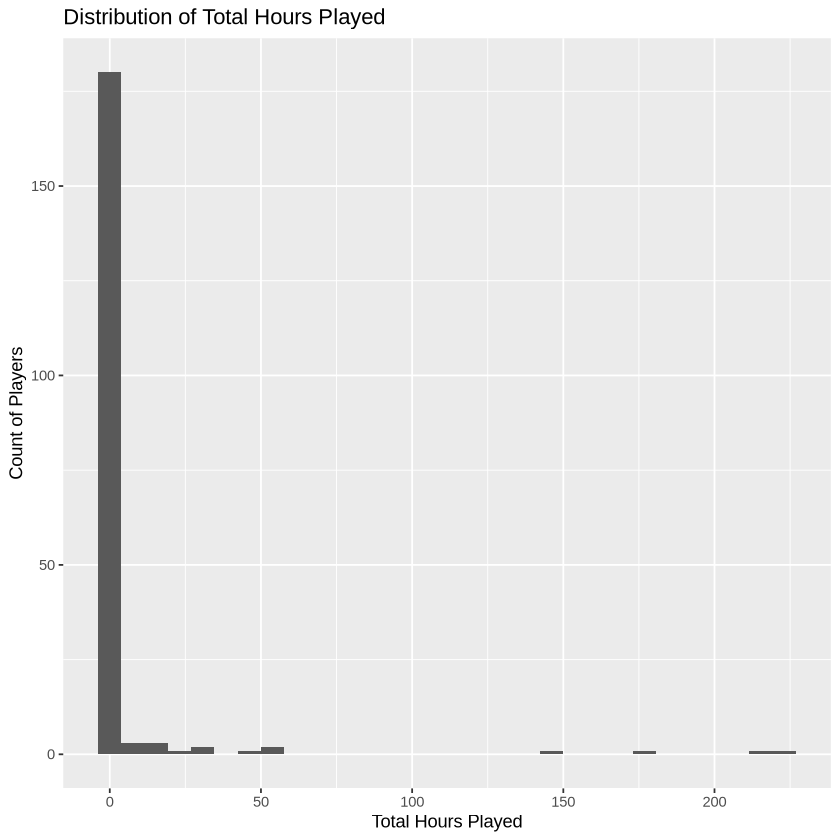

In [70]:
distribution_total_hours <- ggplot(players, aes(x = played_hours)) +
  geom_histogram(bins = 30) +
  labs(title = "Distribution of Total Hours Played",
    x = "Total Hours Played",
    y = "Count of Players")

distribution_total_hours

### Figure 3: Distribution of Total Hours Played

Figure 3 shows that the vast majority of players have logged fewer than 10 hours on the server, resulting in a highly right-skewed distribution. Only a very small number of players exceed 50 hours played, and a few reach over 150-200. This indicates that the population mainly consists of casual players, with few who are very engaged. This is important to mdoel because it suggests that highly engaging players are rare and may disproportionately influence analysis involving total hours played.

## Building the k-Nearest Neighbors Model

We chose to use a K-Nearest Neighbours classification model to answer our question. I think that KNN is appropriate because the target variable is categorical (true/false). In this case, it will predict whether an individual subscribed to a newsletter based on the most common class of the nearest observations. The predictors are experience and played_hours, which must be scaled so that distances are comparable. Furthermore, we trained the model using a certain proportion of the data set and evaluate the prediction accuracy on the remaining portion of data, using a train/test split. 

In [71]:
set.seed(1)

player_split <- initial_split(players, prop = 0.75, strata = subscribe)
player_train <- training(player_split)
player_test  <- testing(player_split)

This split ensures that the proportions subscribed are balanced across sets

In [72]:
player_recipe <- recipe(subscribe ~ experience + played_hours, data = player_train) |>
  step_dummy(all_nominal_predictors()) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

Since KNN relies on the distance between points, we must scale the variables to scaled predictor values for modeling. Additionally, although age showed significant patterns, it was excluded from the final KNN model due to missing values and issues with scaling. Hence, the predictors used for classification were experience and total hours played.

In [73]:
knn_spec <- nearest_neighbor(
  weight_func = "rectangular",
  neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

We use cross-validation to tune the optimal numbers of neighbors:

In [74]:
player_vfold <- vfold_cv(player_train, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(1, 50, by = 2))

knn_results <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(knn_spec) |>
  tune_grid(
    resamples = player_vfold,
    grid = k_vals
  ) |>
  collect_metrics()

We select the best value of k:

In [75]:
best_k <- knn_results |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)

In [76]:
knn_final_spec <- nearest_neighbor(
  weight_func = "rectangular",
  neighbors = best_k
) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_final_fit <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(knn_final_spec) |>
  fit(data = player_train)

This produces accuracy and confusion matrix values that indicate how well the KNN model predicts subscription status:

In [77]:
player_test_predictions <- predict(knn_final_fit, player_test) |>
  bind_cols(player_test)

player_test_predictions |> accuracy(truth = subscribe, estimate = .pred_class)
player_test_predictions |> conf_mat(truth = subscribe, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6734694


          Truth
Prediction FALSE TRUE
     FALSE     0    3
     TRUE     13   33

The KNN model results indicate that the model accurately predicts subscriptions 67.3% of the time. Accuracy reflects the proportion of correct predictions on the test set. Since the dataset is highly imbalanced, accuracy alone may be misleading, which is why it is important to consider the confusion matrix. However, the confusion matrix indicates that out of all 49 predictions, 46 predictions were true while only 3 were predicted false, and all 3 were wrong. 

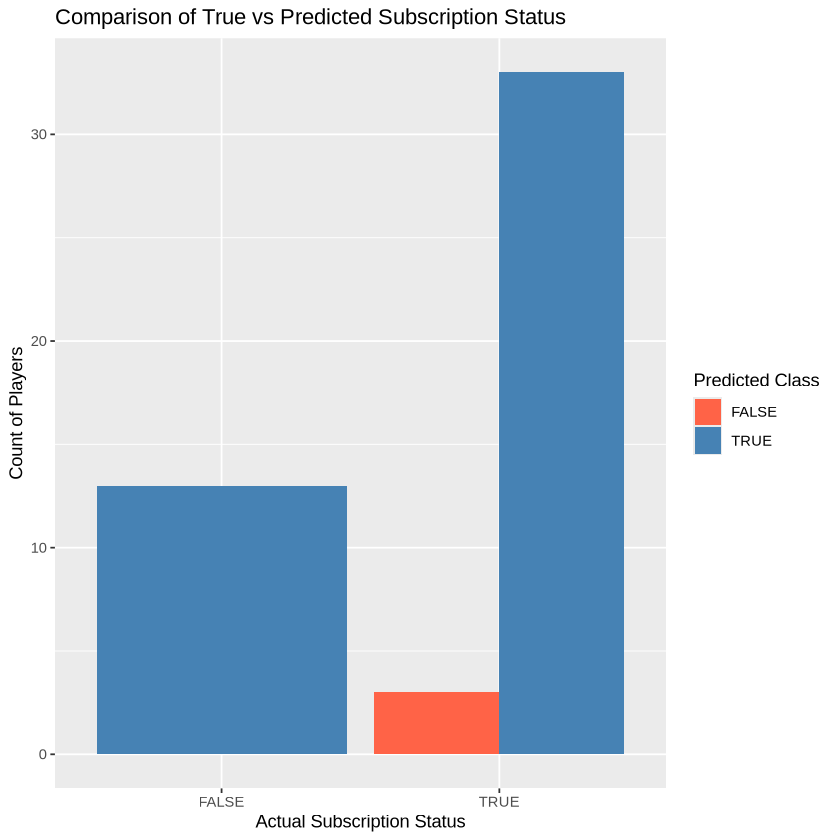

In [78]:
ggplot(player_test_predictions, aes(x = subscribe, fill = .pred_class)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Comparison of True vs Predicted Subscription Status",
    x = "Actual Subscription Status",
    y = "Count of Players",
    fill = "Predicted Class"
  ) +
  scale_fill_manual(values = c("FALSE" = "tomato", "TRUE" = "steelblue"))


### Figure 4: Comparison of True vs Predicted Subscription Status

Figure 4 visually compares the actual subscription status of players with the predicted class labels from the knn model. While it correctly identifies many TRUE cases, it fails to correctly classify any FALSE cases, mislabeling nearly all non-subscribers as TRUE. This demonstrates that the model is heavily biased toward the majority class and struggles to distinguish between subscribers and non-subscribers.

## Discussion